# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

> Bagging melatih model secara paralel untuk mengurangi variansi, sedangkan boosting melatih model secara berurutan untuk memperbaiki kesalahan model sebelumnya.

# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# import data dari datasets.load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 455
Jumlah data uji: 114


In [3]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
import pandas as pd

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=42) # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy_score(y_test, preds)
print("Akurasi model Random Forest:", acc)

Akurasi model Random Forest: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [6]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        ...

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            ...

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        ...

    def _most_common_label(self, y):
        ...

    def predict(self, X):
        ...

        return predictions

## Predict Using Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy(y_test, predictions)
print("Akurasi model Random Forest:", acc)

Akurasi model Random Forest: 0.9649122807017544


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [11]:
# define and train the model using GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
preds = gb.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy_score(y_test, preds)
print("Akurasi model Gradient Boosting:", acc)

Akurasi model Gradient Boosting: 0.956140350877193


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [15]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        ...

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm = Fm + self.lr * h_i.predict(X)

            # Plotting
            p_hat = sigmoid(Fm)
            y_hat = (p_hat >= 0.5).astype(int)
            acc_now = (y_hat == y).mean()
            axs[i].plot(r_i, linewidth=1)
            axs[i].set_title(f"Iter {i+1} | acc={acc_now:.2f}")
            axs[i].set_xticks([])
            axs[i].set_yticks([])

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

In [18]:
# define and train the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# get predictions:
preds = preds = gb.predict(X_test)

# print score menggunakan metrik accuracy
acc = accuracy_score(y_test, preds)
print("Akurasi model Gradient Boosting (sklearn):", acc)

Akurasi model Gradient Boosting (sklearn): 0.956140350877193


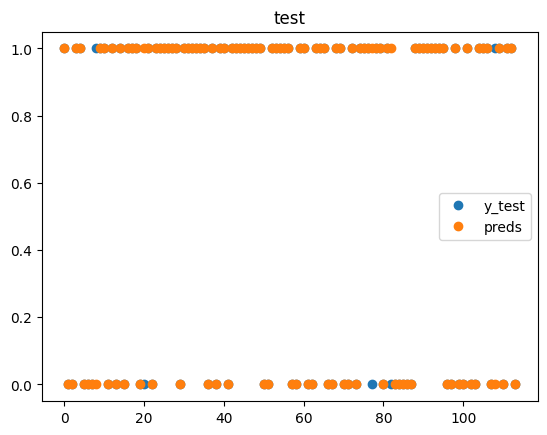

In [20]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()